<a href="https://colab.research.google.com/github/risa1796/Parship/blob/main/BeautifulSoup_Trustpilot_Parship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import math
import csv
import time
import json
import requests
import lxml.html as html
from bs4 import BeautifulSoup

In [20]:
review_titles = []
review_contets = []
review_dates = []
review_replies = []
review_reply_times = [] 
review_stars = []

for i in range(1, 20):
   # german version : https://www.de.trustpilot.com/review/www.parship.de?page={}
   url = "https://www.trustpilot.com/review/www.parship.de?page={}".format(i)
   result = requests.get(url)
   soup = BeautifulSoup(result.content, 'html.parser')
   reviews = soup.select("div > article")

   for review in reviews:

     # Review stars
      cl = review.find(class_= "star-rating_starRating__4rrcf star-rating_medium__iN6Ty")
      img = cl.find("img")
      review_star = img.attrs['alt'][6]
      review_stars.append(review_star)

     # Review titles
      review_title = review.find(class_ = "typography_heading-s__f7029 typography_appearance-default__AAY17")
      review_titles.append(review_title.get_text())

    # Review contents
      review_content = review.find(class_ = "typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn")
      #print(review_content.string)
      #print(review_content.get_text())
      if review_content is not None:
        review_contets.append(review_content.get_text())
      else: 
        review_contets.append(' ')

    # Review dates
      cl_t = review.time.attrs['datetime']
      if cl_t is not None:
        date_time = cl_t[:-5]
        review_dates.append(date_time)
      else:
        review_dates.append(' ')

    # Review reply
      review_reply = review.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
      if review_reply is not None: 
        review_replies.append(review_reply.get_text())
      else: 
        review_replies.append(' ')

    # reply datetime 
      cl_r = review.find(class_ = "typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_")
      if cl_r is not None:
        date_time = cl_r.attrs['datetime'][:-5]
        review_reply_times.append(date_time)
      else:
        review_reply_times.append(' ')


In [21]:
import pandas as pd 

review_data = pd.DataFrame(
{
   'stars': review_stars, 
   'titles':review_titles,
   'contents':review_contets,
   'dates':review_dates,
   'replies':review_replies,
   'reply_time':review_reply_times
})
review_data = review_data.replace('\n','',regex=True)

In [22]:
review_data

,stars,titles,contents,dates,replies,reply_time
0,5,Found the one❤️❤️,Found the one❤️❤️! Parship is the perfect to t...,2023-02-11T15:50:05,"Hey Esther, so happy to hear that you found th...",2023-02-13T08:35:17
1,5,I really appreciate the 79 Questions…,I really appreciate the 79 Questions about my ...,2023-01-29T21:55:40,"Hello Maria, thanks for your review. We‘re hap...",2023-01-31T08:25:18
2,1,Either its me or Parship providing a bad service…,Either Parship is providing a bad service or I...,2023-01-20T20:57:19,"Dear user, please contact our customer service...",2023-01-23T08:33:53
3,1,This website is a scam,This website is a scam. They don't let you can...,2023-01-19T09:43:57,"Hey Valerie, thanks for your review. If you ca...",2023-01-19T08:20:03
4,1,SCAMERS! BE AWARE!,You will get randomly charged because you didn...,2023-01-26T18:07:28,"Dear Milad, the terms and conditions are commu...",2023-01-27T15:57:26
...,...,...,...,...,...,...
367,5,Five stars,"Not all princes and princesses there, but regu...",2022-11-25T06:18:14,"Dear user, thanks for your positive review! We...",2022-11-28T08:30:17
368,1,Thefts. They should all go to jail,So sad I cant give them zero star. I cant beli...,2022-11-14T16:21:08,"Hi Andrej, terms and conditions including the ...",2022-11-16T09:21:19
369,1,Misleading payment options,I signed up and agreed to pay 20 CHF for a one...,2022-10-20T17:54:34,"Dear user, our terms and conditions are shown ...",2022-10-20T16:09:16
370,1,Don't get a contract; they charge you an extre...,Think twice before getting yourself a contract...,2022-10-24T13:35:54,"Hey, thanks for your review. We‘re transparent...",2022-10-25T08:25:55


In [25]:
from numpy import NaN
review_data = review_data.replace(' ', NaN)

In [26]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   stars       372 non-null    object
 1   titles      372 non-null    object
 2   contents    357 non-null    object
 3   dates       372 non-null    object
 4   replies     260 non-null    object
 5   reply_time  260 non-null    object
dtypes: object(6)
memory usage: 17.6+ KB


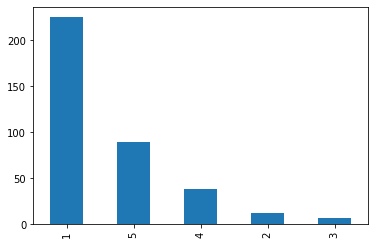

In [28]:
review_data.stars.value_counts().plot.bar()

### Wordcloud for each star ratings

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


STAR RATING 1


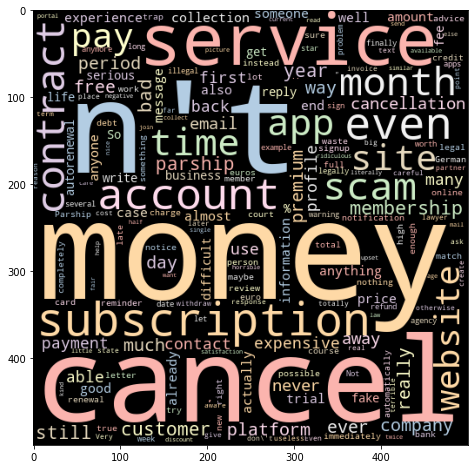

STAR RATING 3


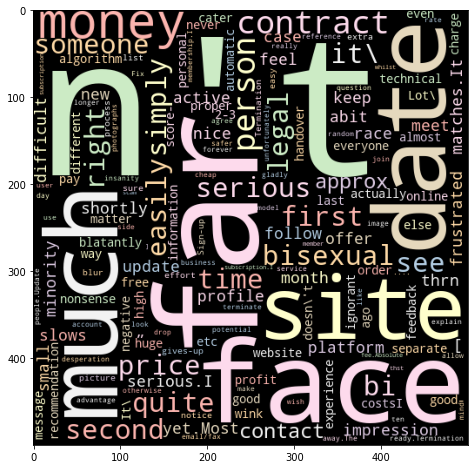

STAR RATING 2


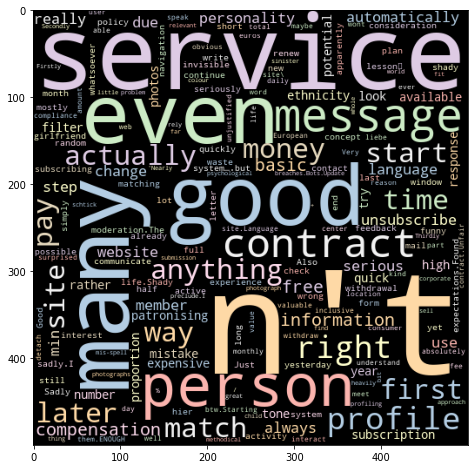

STAR RATING 4


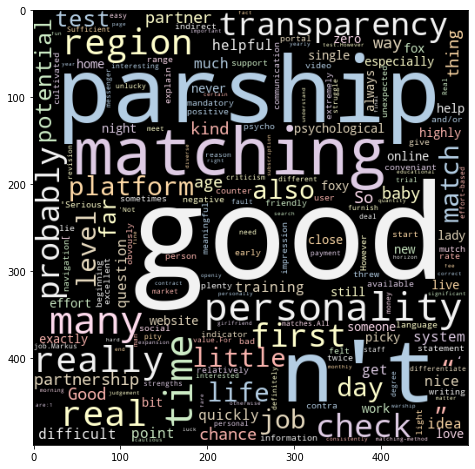

STAR RATING 5


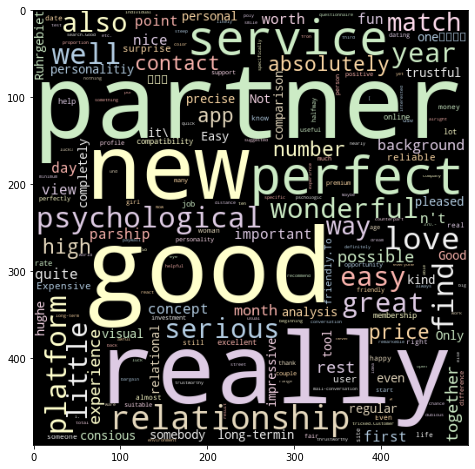

In [70]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stopwords = nltk.corpus.stopwords.words('english')
import matplotlib.pyplot as plt
from wordcloud import WordCloud


def wordcloud(x):

    wordcloud = WordCloud(width = 500, 
                          height = 500,
                          colormap="Pastel1").generate_from_frequencies(x)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud)
    plt.show()
      

grouped = review_data.groupby('stars')
stars= set(review_data.stars.unique())

for i in stars:
  print(f'STAR RATING {i}')
  df= grouped.get_group(i)
  text= [''.join(str(i)) for i in df.contents]

  review = nltk.word_tokenize(str(text))
  review = [w for w in review if not w in stopwords]
  pos_tagged = nltk.pos_tag(review)
  words = filter(lambda x:x[1] in ('JJ','NN','RB') ,pos_tagged)

  count_words = dict()
  for word in words:
    word = word[0]
    if word in count_words:
      count_words[word]+=1
    else:
      count_words[word] = 1
  
  wordcloud(count_words)

### Data visualization